<a href="https://colab.research.google.com/github/SmurferUA/Machine-Learning-/blob/main/Bias_in_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bias in salary allocation, created by Nataliia.

In [ ]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# load the data
data = pd.read_csv('Salary.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [ ]:
#Exploring the data
data.tail()
data["Education Level"].value_counts()

Education Level
1    3021
2    1858
3    1369
0     436
Name: count, dtype: int64

In [ ]:
data.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [ ]:
data.shape

(6684, 9)

In [ ]:
#check for null values
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [ ]:
# check for duplicates and print them
duplicate = data[data.duplicated()]
print(duplicate)

       Age  Gender  Education Level                       Job Title  \
252   28.0    Male                1  Business Development Associate   
308   29.0  Female                1  Business Development Associate   
343   33.0    Male                1                Business Analyst   
372   44.0  Female                3                Business Analyst   
390   31.0  Female                1               Software Engineer   
...    ...     ...              ...                             ...   
6663  51.0  Female                2       Content Marketing Manager   
6664  37.0    Male                1                  Sales Director   
6672  24.0    Male                1                 Sales Executive   
6677  51.0  Female                2       Product Marketing Manager   
6683  26.0  Female                0                 Sales Executive   

      Years of Experience    Salary    Country     Race  Senior  
252                   2.0   40000.0        USA    Asian       0  
308            

In [ ]:
# Drop duplicates
data=data.drop_duplicates()

In [ ]:
# confirm that all duplicates are dropped
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country, Race, Senior]
Index: []


In [ ]:
data.dtypes

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object

In [ ]:
# encouding Age , Years of Experience, Salary
data["Age"] = data["Age"].astype(int)
data['Years of Experience']=data['Years of Experience'].astype(int)
data['Salary']= data['Salary'].astype(int)

In [ ]:
# unique gender value
data["Gender"].value_counts()

Gender
Male      2808
Female    2340
Name: count, dtype: int64

In [ ]:
# replace value( Female = 0, Male = 1 )
data["Gender"].replace({"Male":1,"Female":0}, inplace = True)

In [ ]:
#unique gender value
data["Country"].value_counts()

Country
USA          1076
UK           1056
Australia    1021
China        1009
Canada        986
Name: count, dtype: int64

In [ ]:
# replacing  values
country = {"USA":1, "UK":2, "Australia":3, "China":4, "Canada":5}
data["Country"]= data["Country"].replace(country)
data["Country"]= data["Country"].astype(int)


In [ ]:

data["Race"].value_counts()

Race
White               1514
Asian               1223
Australian           358
Korean               339
Chinese              332
Black                328
African American     266
Welsh                265
Hispanic             262
Mixed                261
Name: count, dtype: int64

In [ ]:
race= {"White":1, "Asian":2, "Australian":3, "Korean":4, "Chinese":5,"Black" :6, "African American": 5, "Welsh":6, "Hispanic" : 7, "Mixed":8 }
data["Race"]= data["Race"].replace(race)
data["Race"] = data["Race"].astype(int)

In [ ]:
label = LabelEncoder()
data["Job Title"]= label.fit_transform(data["Job Title"])
lab = dict(zip(label.classes_, label.transform(label.classes_)))
print(lab)

{'Account Executive': 0, 'Account Manager': 1, 'Accountant': 2, 'Administrative Assistant': 3, 'Advertising Coordinator': 4, 'Back end Developer': 5, 'Business Analyst': 6, 'Business Development Associate': 7, 'Business Development Manager': 8, 'Business Intelligence Analyst': 9, 'Business Operations Analyst': 10, 'CEO': 11, 'Chief Data Officer': 12, 'Chief Technology Officer': 13, 'Consultant': 14, 'Content Marketing Manager': 15, 'Copywriter': 16, 'Creative Director': 17, 'Customer Service Manager': 18, 'Customer Service Rep': 19, 'Customer Service Representative': 20, 'Customer Success Manager': 21, 'Customer Success Rep': 22, 'Customer Support Specialist': 23, 'Data Analyst': 24, 'Data Engineer': 25, 'Data Entry Clerk': 26, 'Data Scientist': 27, 'Delivery Driver': 28, 'Designer': 29, 'Developer': 30, 'Digital Content Producer': 31, 'Digital Marketing Manager': 32, 'Digital Marketing Specialist': 33, 'Director': 34, 'Director of Business Development': 35, 'Director of Data Science':

In [ ]:
data.dtypes

Age                    int64
Gender                 int64
Education Level        int64
Job Title              int64
Years of Experience    int64
Salary                 int64
Country                int64
Race                   int64
Senior                 int64
dtype: object

In [ ]:
data["Age"].value_counts()

Age
27    372
30    347
28    325
29    324
33    300
26    299
31    279
32    245
34    231
36    225
25    209
35    171
24    155
42    138
43    131
38    124
45    122
37    117
39    117
44    114
41    107
46     91
23     82
40     76
48     75
49     74
50     72
54     51
47     41
51     26
52     26
55     15
22     13
21     11
56     10
57      9
58      7
53      5
62      5
60      5
61      2
Name: count, dtype: int64

In [ ]:
bin = [18,35,50,100]
label =["young", "middle", "senior"]
data["Age Group"]=pd.cut(data["Age"], bins = bin, labels=label,right = False)


In [ ]:
data["Age Group"].value_counts()

Age Group
young     3192
middle    1723
senior     233
Name: count, dtype: int64

In [ ]:
lab = LabelEncoder()
data["Age Group"]= lab.fit_transform(data["Age Group"])

In [ ]:
data['Age Group'].value_counts()

Age Group
2    3192
0    1723
1     233
Name: count, dtype: int64

In [ ]:
data.drop("Age", axis =1, inplace= True)

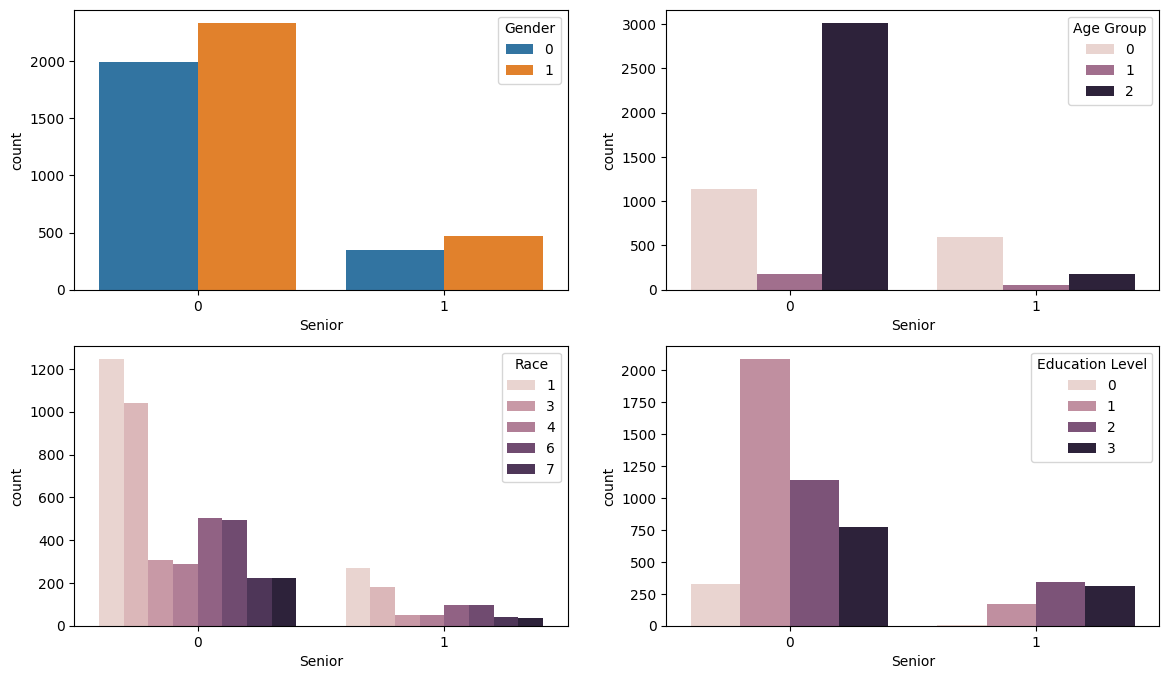

In [ ]:
fig, ax = plt.subplots(2,2 ,figsize = (14,8))
sns.countplot(x="Senior", hue="Gender", data=data, ax=ax[0,0])
sns.countplot(x="Senior", hue="Age Group", data=data, ax=ax[0,1])
sns.countplot(x="Senior", hue="Race", data=data, ax=ax[1,0])
sns.countplot(x="Senior", hue="Education Level", data=data, ax=ax[1,1])

fig.show()

<Axes: >

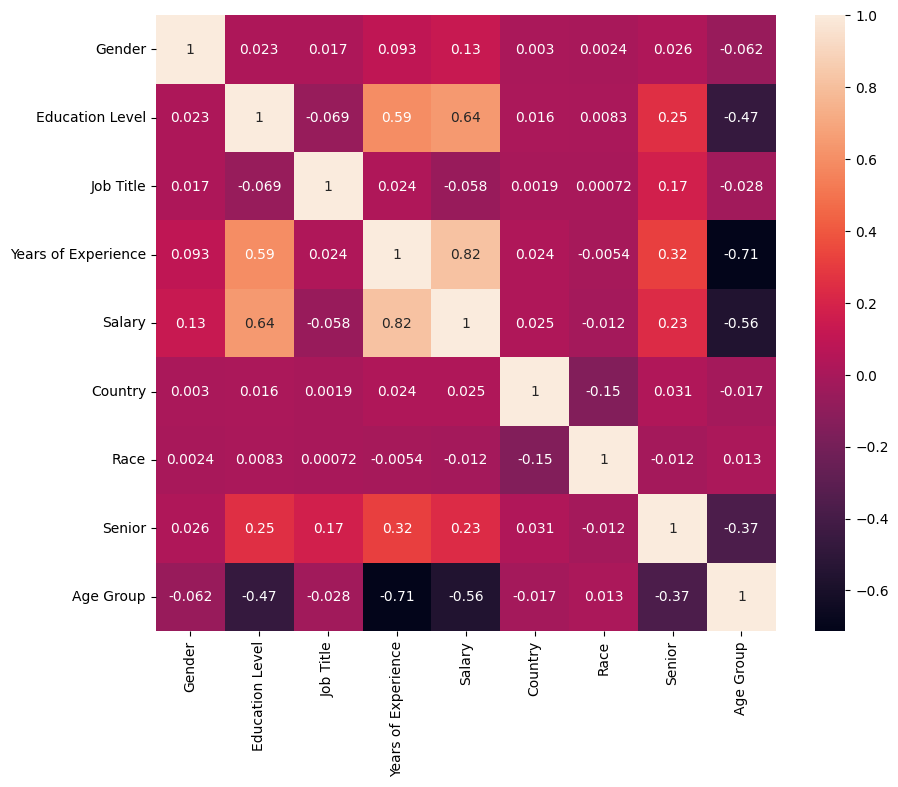

In [ ]:
# Generate a Correlation Matrix
cor= data.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(cor, annot =True)

In [ ]:
print(data.corr()["Senior"].abs().sort_values(ascending=False))

Senior                 1.000000
Age Group              0.365142
Years of Experience    0.316578
Education Level        0.252746
Salary                 0.234674
Job Title              0.172343
Country                0.031208
Gender                 0.025523
Race                   0.012311
Name: Senior, dtype: float64


In [ ]:
# create the attribute and target data
#attributes
x = data.drop(columns = ["Senior","Race","Country"])
#target
y = data["Senior"]
x.head()


,Gender,Education Level,Job Title,Years of Experience,Salary,Age Group
0,1,1,112,5,90000,2
1,0,2,24,3,65000,2
2,1,3,72,15,150000,0
3,0,1,100,7,60000,0
4,1,2,34,20,200000,1


In [ ]:
# split the data into training and test
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size =0.2, random_state= 42 )


In [ ]:
#create the Random Forest classification model
model_s = RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state =0 )
model_s.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
#the feature importances
importances = model_s.feature_importances_
feature_names = x_train.columns
feature_importances = list(zip(feature_names, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)
for feature_name, importance in feature_importances:
    print(f"{feature_name}: {importance}")

Job Title: 0.48802703104882317
Salary: 0.18662698916808793
Years of Experience: 0.15102733983627517
Age Group: 0.08401923143737917
Education Level: 0.06968793932416453
Gender: 0.020611469185270074


In [ ]:
# evaluating using the training data
y_pred = model_s.predict(x_train)
Accur_score = metrics.accuracy_score(y_train, y_pred)
Precision_sc = metrics.precision_score(y_train, y_pred)
recall = metrics.recall_score(y_train, y_pred)
print(Accur_score, Precision_sc, recall)
print(classification_report(y_train, y_pred))

0.9927149101505586 0.9968553459119497 0.9577039274924471
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3456
           1       1.00      0.96      0.98       662

    accuracy                           0.99      4118
   macro avg       0.99      0.98      0.99      4118
weighted avg       0.99      0.99      0.99      4118



In [ ]:
# evaluating using the testing data
y_test_p = model_s.predict(x_test)
accuracy_test = metrics.accuracy_score(y_test, y_test_p)
precision_test = metrics.precision_score(y_test, y_test_p)
recall_test = metrics.recall_score(y_test, y_test_p)

In [ ]:
#print accuracy, precision and recall. Also printing the classification report
print(accuracy_test,precision_test, recall_test)
print(classification_report(y_test, y_test_p))

0.974757281553398 0.9477124183006536 0.8895705521472392
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       867
           1       0.95      0.89      0.92       163

    accuracy                           0.97      1030
   macro avg       0.96      0.94      0.95      1030
weighted avg       0.97      0.97      0.97      1030



TN=3454, FP=2, FN=28, TP=634


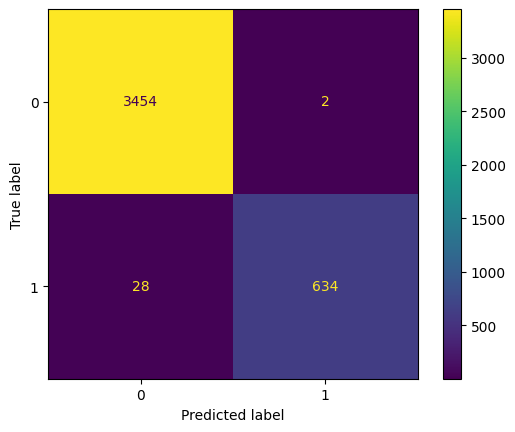

In [ ]:
#Creating the confusion metrix for train data
cm = metrics.confusion_matrix(y_train, y_pred)
TN, FP, FN, TP =cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

TN=859, FP=8, FN=18, TP=145


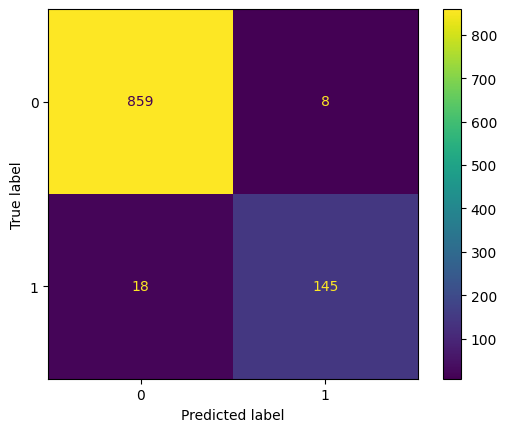

In [ ]:
#Creat the confusion metrix for the test data
cm = metrics.confusion_matrix(y_test, y_test_p)
TN, FP, FN, TP =cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

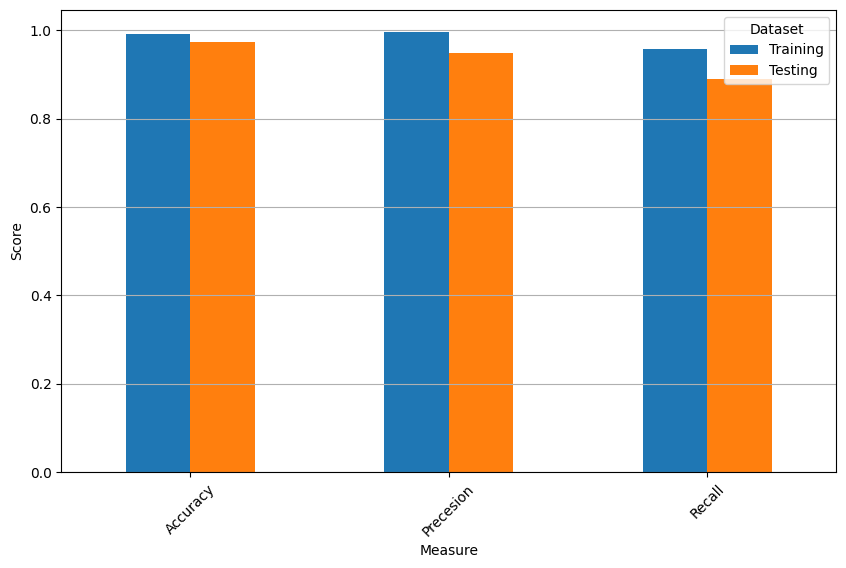

In [ ]:
# Creating the bar chart showing the diffeernt between the metrics
measures = [Accur_score, Precision_sc, recall]
name= ["Accuracy", "Precesion", "Recall",]
measure_test = [accuracy_test,precision_test, recall_test]
data_measure = pd.DataFrame({
    'Measure': name,
    'Training':measures,
    'Testing': measure_test
})
data_measure.set_index('Measure', inplace=True)
data_measure.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Measure')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Dataset')
plt.show()

In [ ]:
# splitting the true and predicted values into male and female groups
protected = "Gender"
female= 0.0
mal = 1.0
age = x_test[protected].value_counts()
print(age)
f_indicates = np.where(x_test[protected]== female )[0]
m_indicates = np.where(x_test[protected]== mal)[0]

print(f_indicates, "No of female", f_indicates.size)
print("*"*20)
print(m_indicates, "No of male", m_indicates.size)

Gender
1    550
0    480
Name: count, dtype: int64
[   3    4    7    8   10   12   13   14   17   18   22   29   30   32
   34   36   38   39   41   43   44   51   52   53   54   58   60   62
   63   64   66   68   72   73   74   77   81   83   85   87   88   89
   91   95   97   99  101  103  104  109  118  119  120  122  123  126
  127  129  130  133  135  136  137  140  141  144  147  149  151  152
  153  154  155  156  157  158  159  161  162  163  165  166  167  168
  169  170  171  173  177  179  182  184  185  186  191  192  193  194
  195  203  205  206  211  212  213  214  221  222  224  226  227  229
  230  232  233  234  239  242  244  245  247  248  255  256  258  264
  267  268  269  271  272  273  274  277  278  279  281  283  285  295
  296  297  298  302  303  305  307  308  312  316  317  320  325  326
  327  329  330  331  339  344  345  346  350  352  354  357  358  359
  362  364  365  366  368  369  370  373  374  377  379  385  387  388
  390  392  396  398  404 

In [ ]:
#ectract the actual and predicted outcomes for the two groups
y_test_f = [y_test.values[i]for i in f_indicates ]
y_test_m = [y_test.values[i]for i in m_indicates ]
print(y_test_f)
print(y_test_m)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 

TN=408, FP=4, FN=10, TP=58


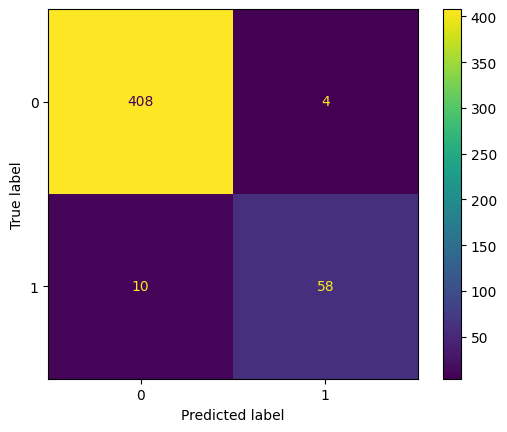

In [ ]:
# Creat the confusion matrix for female
y_pred_f = [y_test_p[i] for i in f_indicates]
cm_y = metrics.confusion_matrix(y_test_f, y_pred_f)
TN, FP, FN, TP =cm_y.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_y)
disp.plot()
plt.show()

TN=451, FP=4, FN=8, TP=87


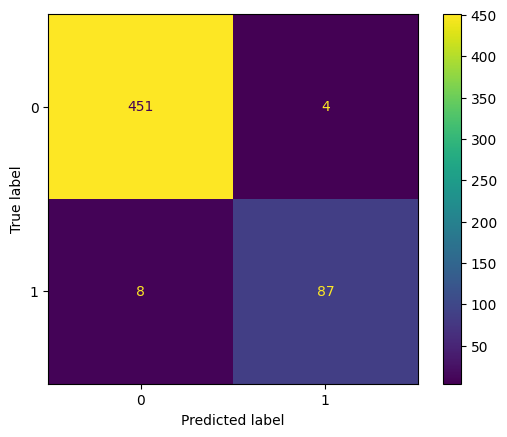

In [ ]:
# create the confussion metrix for males
y_pred_m = [y_test_p[i] for i in m_indicates]
cm_m = metrics.confusion_matrix(y_test_m, y_pred_m)
TN, FP, FN, TP =cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp.plot()
plt.show()

In [ ]:
# calculate accuracy , recall , precision for males
print("Males")
print(classification_report(y_test_m, y_pred_m))
print(metrics.accuracy_score(y_test_m, y_pred_m))
accuracy_m =metrics.accuracy_score(y_test_m, y_pred_m)
precision_m = metrics.precision_score(y_test_m, y_pred_m)
recall_m = metrics.recall_score(y_test_m, y_pred_m)
print("precision", precision_m)
print("recall" , recall_m)
print("accuracy" , accuracy_m)

MIDDLE
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       455
           1       0.96      0.92      0.94        95

    accuracy                           0.98       550
   macro avg       0.97      0.95      0.96       550
weighted avg       0.98      0.98      0.98       550

0.9781818181818182
precision 0.9560439560439561
recall 0.9157894736842105
accuracy 0.9781818181818182


In [ ]:
#create the confussion metrix for females
print("Female")
print(classification_report(y_test_f, y_pred_f))
print(metrics.accuracy_score(y_test_f, y_pred_f))
accuracy = metrics.accuracy_score(y_test_f, y_pred_f)
precision = metrics.precision_score(y_test_f, y_pred_f)
recall = metrics.recall_score(y_test_f, y_pred_f)
print("precision", precision)
print("recall" , recall)

Young
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       412
           1       0.94      0.85      0.89        68

    accuracy                           0.97       480
   macro avg       0.96      0.92      0.94       480
weighted avg       0.97      0.97      0.97       480

0.9708333333333333
precision 0.9354838709677419
recall 0.8529411764705882


Demographic Parity (Female): 0.12916666666666668
Demographic Parity (Male): 0.16545454545454547
Accuracy score (Female): 0.9708333333333333
Accuracy score (Male): 0.9781818181818182
Equal Opportunity (Female): 0.8529411764705882
Equal Opportunity (Male): 0.9157894736842105
TN=408, FP=4, FN=10, TP=58


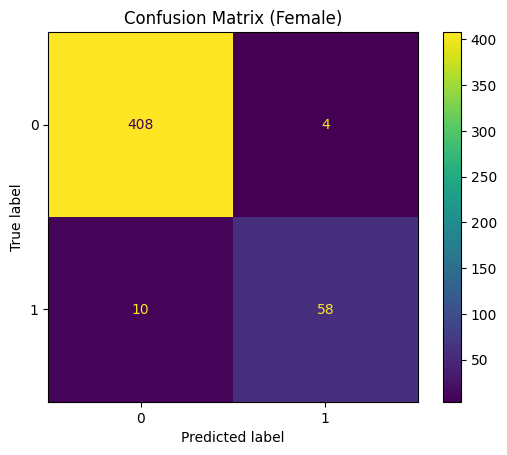

TN=451, FP=4, FN=8, TP=87


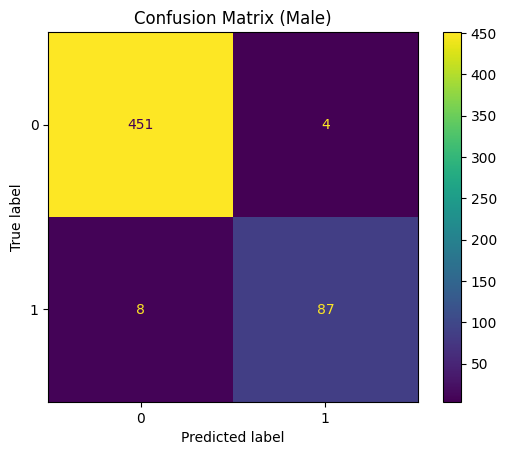

In [ ]:
# creat the confusion matrix for males and females
cm_f = metrics.confusion_matrix(y_test_f, y_pred_f)
cm_m = metrics.confusion_matrix(y_test_m, y_pred_m)
# calculate the eaqual accuracy , demographic parity, eaqual opportunity
DP_f = np.sum(y_pred_f) / len(y_pred_f)
DP_m = np.sum(y_pred_m) / len(y_pred_m)
acc_f =metrics.accuracy_score(y_test_f, y_pred_f)
acc_m =metrics.accuracy_score(y_test_m, y_pred_m)
TPR_f = cm_f[1, 1] / (cm_f[1, 1] + cm_f[1, 0])
TPR_m = cm_m[1, 1] / (cm_m[1, 1] + cm_m[1, 0])
print("Demographic Parity (Female):", DP_f)
print("Demographic Parity (Male):", DP_m)
print("Accuracy score (Female):", acc_f)
print("Accuracy score (Male):", acc_m)
print("Equal Opportunity (Female):", TPR_f)
print("Equal Opportunity (Male):", TPR_m)
disp_f = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
TN, FP, FN, TP =cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_f.plot()
plt.title("Confusion Matrix (Female)")
plt.show()

disp_m = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
TN, FP, FN, TP = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp_m.plot()
plt.title("Confusion Matrix (Male)")
plt.show()


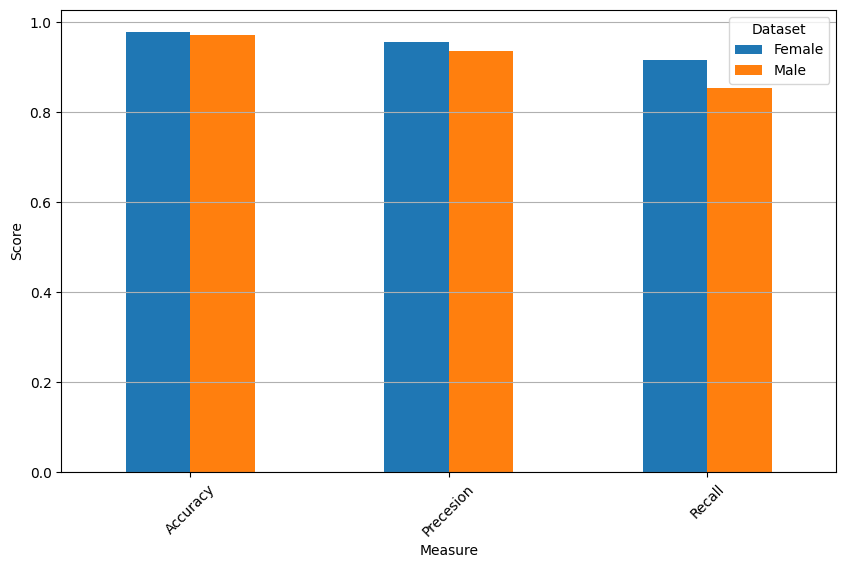

In [ ]:
# creat the  bar chart with distibution females and males metrics
measures = [accuracy_m, precision_m, recall_m ]
name= ["Accuracy", "Precesion", "Recall",]
measure_test = [accuracy, precision, recall]
data_measure = pd.DataFrame({
    'Measure': name,
    'Female':measures,
    'Male': measure_test
})
data_measure.set_index('Measure', inplace=True)
data_measure.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Measure')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Dataset')
plt.show()